In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import os

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('data/kaggle_star_data.csv')

In [3]:
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
new_names = {'Temperature (K)': 'Temperature(K)',
             'Luminosity (L/Lo)': 'Luminosity(L/Lo)',
             'Absolute magnitude(Mv)': 'Abs_Magnitude(MV)',
             'Star type': 'STAR_TYPE',
             'Star color': 'Star_color',
             'Spectral Class': 'Spectral_class'}

df = df.rename(columns=new_names)

Start type is the target value

In [6]:
df.describe()

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Abs_Magnitude(MV),STAR_TYPE
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
df.columns

Index(['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Abs_Magnitude(MV)', 'STAR_TYPE', 'Star_color', 'Spectral_class'],
      dtype='object')

In [ ]:
msno.matrix(df, figsize=(10, 8))

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated(subset=('Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Abs_Magnitude(MV)'))\
    .sum()

In [ ]:
df['START_TYPE'].value_counts()

In [24]:
df['Spectral_class'].value_counts()

Spectral_class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

In [17]:
df = (df.replace(to_replace='Blue ', value='Blue')
      .replace(to_replace=r'Blue[ -][Ww]hite[ ]?', value='Blue-White', regex=True)
      .replace(to_replace=[r'[Ww]hite', 'Whitish'], value='White', regex=True)
      .replace(to_replace=['Yellowish White', 'White-Yellow', r'[Yy]ellow-[Ww]hite'], value='Yellow-White', regex=True)
      .replace(to_replace=['Yellow', r'[Yy]ellowish', 'Pale yellow orange'], value='Yellow', regex=True)
)

In [19]:
df['STAR_TYPE'] = df['STAR_TYPE'].astype('category')
df['Star_color'] = df['Star_color'].astype('category')
df['Spectral_class'] = df['Spectral_class'].astype('category')

In [20]:
df[['STAR_TYPE', 'Star_color', 'Spectral_class']].describe()

,STAR_TYPE,Star_color,Spectral_class
count,240,240,240
unique,6,8,7
top,0,Red,M
freq,40,112,111


### Variable Visualization

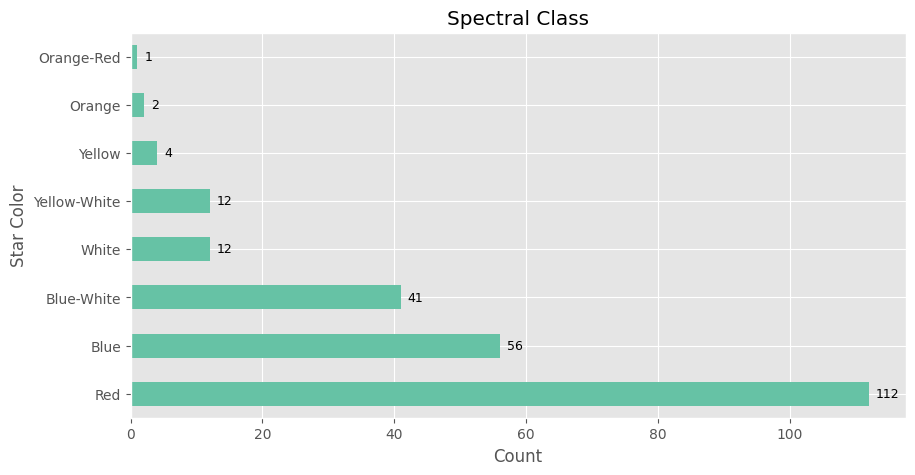

In [ ]:
ax = df['Star_color'].value_counts().plot(kind='barh', title='Spectral Class', figsize=(10, 5), colormap='Set2')

ax.set_xlabel('Count')

ax.set_ylabel('Star Color')
for container in ax.containers:
    for i, patch in enumerate(container.patches):
        ax.annotate(f'{int(patch.get_width())}',
                    xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2),
                    xytext=(5, 0),
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=9, color='black')

<Axes: xlabel='Abs_Magnitude(MV)', ylabel='Percent'>

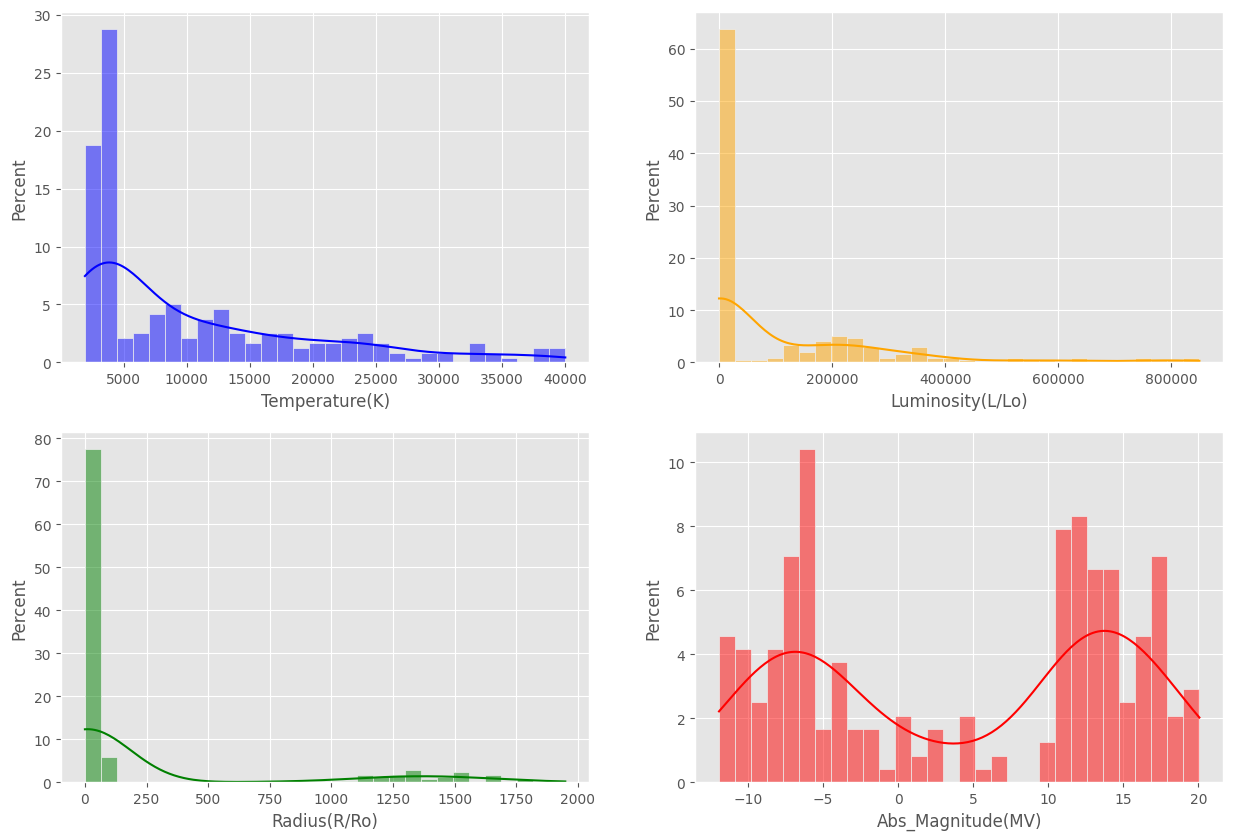

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Temperature(K)', kde=True, color='blue', bins=30, ax=axs[0, 0], stat='percent')

sns.histplot(data=df, x='Luminosity(L/Lo)', kde=True, color='orange', bins=30, ax=axs[0, 1], stat='percent')

sns.histplot(data=df, x='Radius(R/Ro)', kde=True, color='green', bins=30, ax=axs[1, 0], stat='percent')

sns.histplot(data=df, x='Abs_Magnitude(MV)', kde=True, color='red', bins=30, ax=axs[1, 1], stat='percent')

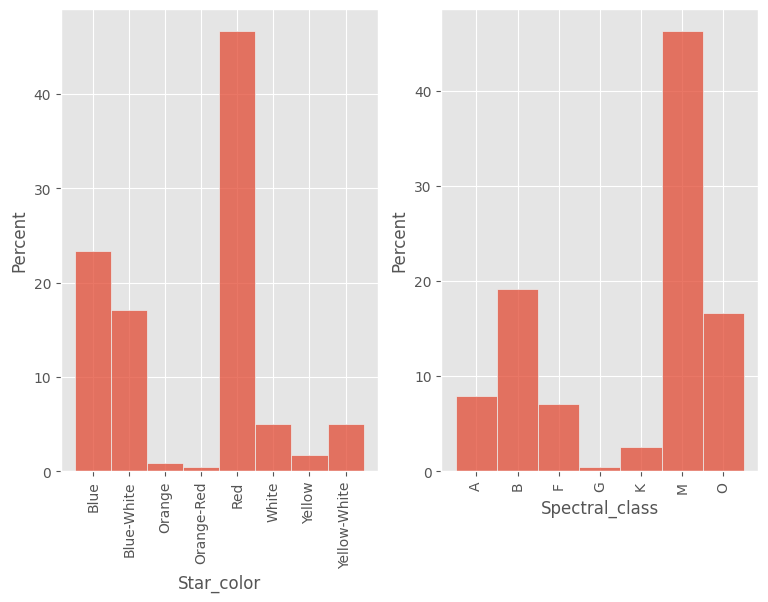

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


sns.histplot(data=df, x='Star_color',  stat='percent',  bins=30, ax=axs[0], discrete=True)
sns.histplot(data=df, x='Spectral_class',  stat='percent',  bins=30, ax=axs[1], discrete=True)

for ax in axs:
    ax.tick_params(axis='x', rotation=90)

### Variable Relationship

In [148]:
corr = df[['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Abs_Magnitude(MV)', 'STAR_TYPE']].corr()
corr.style.background_gradient(cmap='RdBu_r')

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Abs_Magnitude(MV),STAR_TYPE
Temperature(K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Abs_Magnitude(MV),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
STAR_TYPE,0.411129,0.676845,0.660975,-0.955276,1.000000


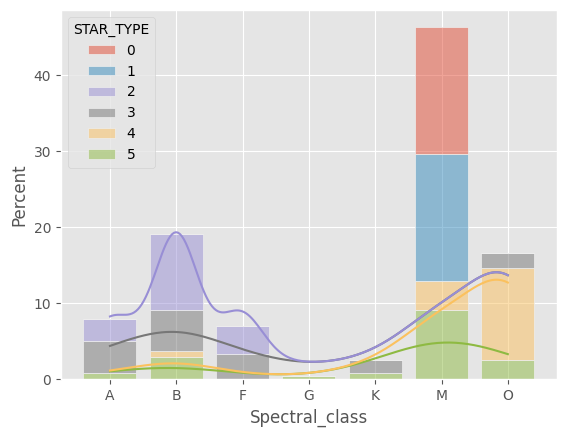

In [102]:
ax = sns.histplot(x='Spectral_class', data=df, hue='STAR_TYPE', multiple='stack',
                  stat='percent', shrink=0.8, discrete=True, kde=True)

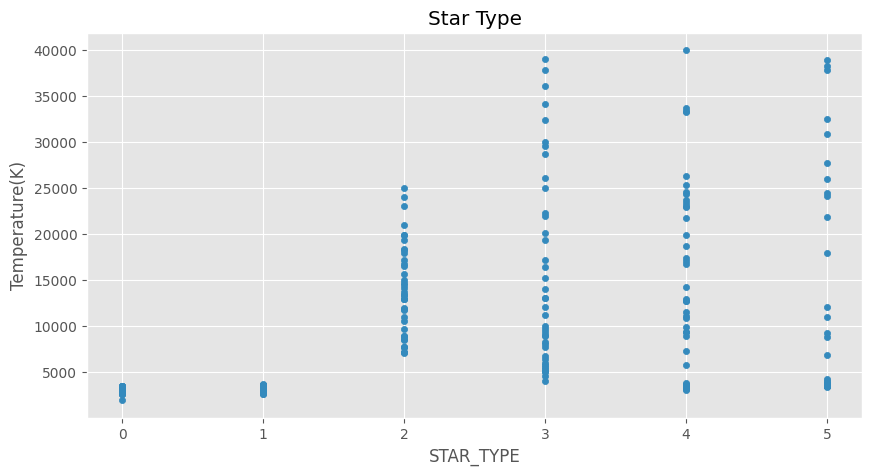

In [58]:
ax = df.plot(kind='scatter', x='STAR_TYPE', y='Temperature(K)',  title='Star Type', figsize=(10, 5))


In [66]:
grouped = df.groupby('STAR_TYPE', observed=True)['Temperature(K)'].aggregate(['mean', 'median', 'std'])

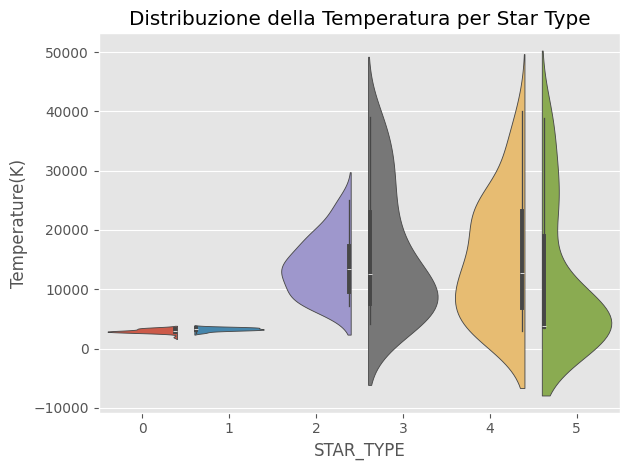

In [78]:
plt.Figure(figsize=(10, 5))
sns.violinplot(x='STAR_TYPE', y='Temperature(K)', data=df, inner='box', hue='STAR_TYPE', legend=False, split=True)
plt.title('Distribuzione della Temperatura per Star Type')
plt.xlabel('STAR_TYPE')
plt.ylabel('Temperature(K)')
plt.tight_layout()
plt.show()

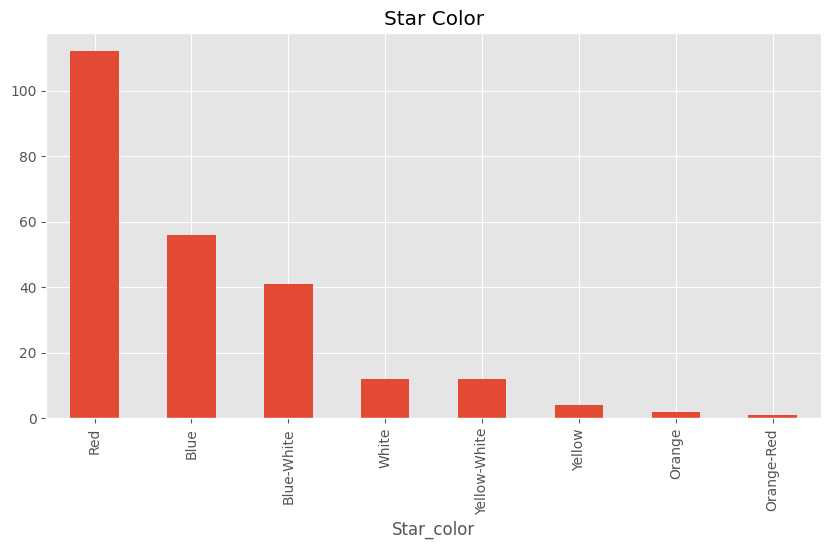

In [ ]:
ax = df['Star_color'].value_counts().plot(kind='bar', title='Star Color', figsize=(10, 5))